# FLOWER RECOGNITION USING CONVOLUTIONAL NEURAL NETWORK

**1. Importing the necessary libraries**

In [25]:
import tensorflow as tf
import tensorflow_datasets as tfds
import time
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

In [2]:
# Constants
IMG_SIZE = 180
BATCH_SIZE = 32
EPOCHS = 10
AUTOTUNE = tf.data.AUTOTUNE  # This is used to parallelize data loading

**Function to format image**

In [3]:
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image /= 255.0
    return image, label

**Function to create and compile model**

In [4]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

**Data Loading and Preprocessing**

In [26]:
import tensorflow_datasets as tfds
(train_ds, val_ds), ds_info = tfds.load( 'tf_flowers',
    split=['train[:85%]', 'train[85%:]'],
    with_info=True,
    as_supervised=True,
)

**Training the model and recording the time**

In [6]:
# Baseline Training
train_batches_baseline = train_ds.shuffle(1000).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches_baseline = val_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)

model_baseline = create_model()

# Start the timer
start_time_baseline = time.time()

# Baseline training
history_baseline = model_baseline.fit(train_batches_baseline, epochs=EPOCHS, validation_data=validation_batches_baseline)

# End the timer
end_time_baseline = time.time()
baseline_training_time = end_time_baseline - start_time_baseline



Epoch 1/10
98/98 [==============================] - 32s 323ms/step - loss: 1.2918 - accuracy: 0.4798 - val_loss: 0.9748 - val_accuracy: 0.6055
Epoch 2/10
98/98 [==============================] - 33s 333ms/step - loss: 0.9372 - accuracy: 0.6327 - val_loss: 0.8980 - val_accuracy: 0.6436
Epoch 3/10
98/98 [==============================] - 34s 346ms/step - loss: 0.7342 - accuracy: 0.7176 - val_loss: 0.8093 - val_accuracy: 0.6782
Epoch 4/10
98/98 [==============================] - 37s 382ms/step - loss: 0.5014 - accuracy: 0.8096 - val_loss: 0.9180 - val_accuracy: 0.6800
Epoch 5/10
98/98 [==============================] - 35s 352ms/step - loss: 0.2927 - accuracy: 0.8990 - val_loss: 1.1433 - val_accuracy: 0.6782
Epoch 6/10
98/98 [==============================] - 32s 328ms/step - loss: 0.1762 - accuracy: 0.9404 - val_loss: 1.5090 - val_accuracy: 0.6636
Epoch 7/10
98/98 [==============================] - 34s 344ms/step - loss: 0.1051 - accuracy: 0.9686 - val_loss: 1.4973 - val_accuracy: 0.6600

In [27]:
# Obtain true and predicted labels for the validation set
y_true = np.concatenate([y.numpy() for x, y in validation_batches.unbatch().batch(1)])
y_pred = np.argmax(model.predict(validation_batches), axis=1)

18/18 [==============================] - 2s 80ms/step


**Modified Training with Parallel Processing**

In [28]:
train_batches = (train_ds.shuffle(1000).map(format_image, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE))
validation_batches = (val_ds.map(format_image, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE))

model = create_model()

**Record time**

In [29]:
# Start the timer
start_time_modified = time.time()

**Training the model with Parallel Model**

In [30]:
# Enhanced training
history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)


Epoch 1/10
98/98 [==============================] - 32s 316ms/step - loss: 1.4704 - accuracy: 0.4250 - val_loss: 1.1280 - val_accuracy: 0.5418
Epoch 2/10
98/98 [==============================] - 31s 311ms/step - loss: 1.0234 - accuracy: 0.5901 - val_loss: 0.9277 - val_accuracy: 0.6255
Epoch 3/10
98/98 [==============================] - 31s 317ms/step - loss: 0.8206 - accuracy: 0.6849 - val_loss: 0.8896 - val_accuracy: 0.6436
Epoch 4/10
98/98 [==============================] - 32s 323ms/step - loss: 0.6388 - accuracy: 0.7577 - val_loss: 0.9377 - val_accuracy: 0.6582
Epoch 5/10
98/98 [==============================] - 32s 325ms/step - loss: 0.3833 - accuracy: 0.8603 - val_loss: 1.0321 - val_accuracy: 0.6618
Epoch 6/10
98/98 [==============================] - 32s 326ms/step - loss: 0.2237 - accuracy: 0.9260 - val_loss: 1.3668 - val_accuracy: 0.6309
Epoch 7/10
98/98 [==============================] - 32s 331ms/step - loss: 0.1207 - accuracy: 0.9625 - val_loss: 1.6840 - val_accuracy: 0.6527

**Evaluation**

In [31]:
# Evaluation
val_loss, val_accuracy = model.evaluate(validation_batches)
print(f'Validation accuracy: {val_accuracy}')

18/18 [==============================] - 2s 101ms/step - loss: 2.0103 - accuracy: 0.6400
Validation accuracy: 0.6399999856948853


****Classification Report****

2023-12-14 20:30:19.832819: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


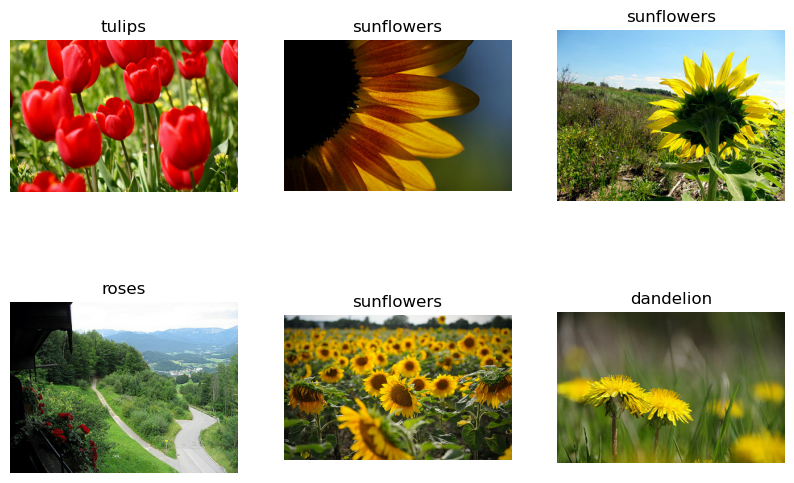

In [32]:
# Load the TensorFlow Flowers dataset
dataset, info = tfds.load('tf_flowers', with_info=True,
as_supervised=True)

# Get the training dataset
train_dataset = dataset['train']

# Define the number of examples to display
num_examples = 6

# Initialize the plot
plt.figure(figsize=(10, 10))

# Loop to plot several examples
for i, (image, label) in enumerate(train_dataset.take(num_examples)): 
    plt.subplot(3, 3, i + 1)
    plt.imshow(image) 
    plt.title(info.features['label'].int2str(label))
    plt.axis('off')
    
# Show the plot
plt.show()

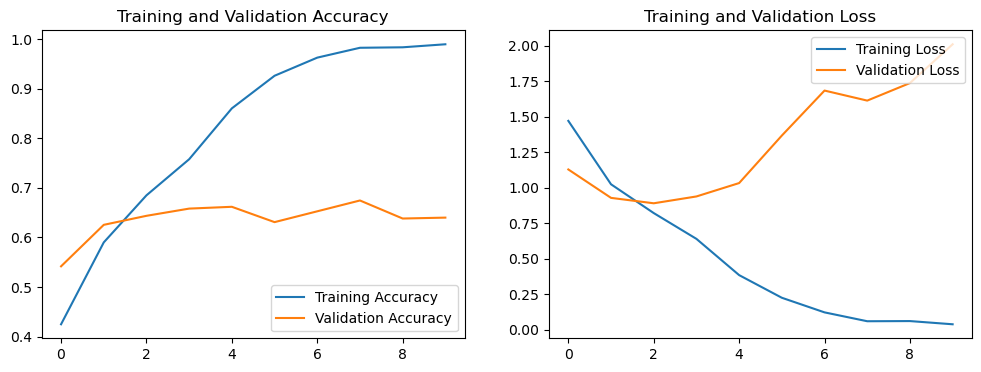

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Confusion Matrix**

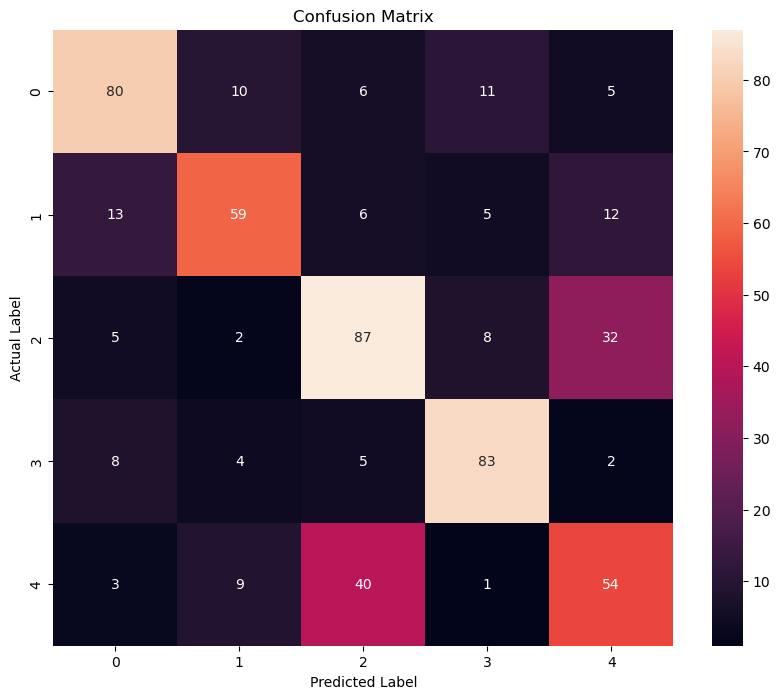

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Classification Report**

In [34]:
# Classification Report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       112
           1       0.70      0.62      0.66        95
           2       0.60      0.65      0.63       134
           3       0.77      0.81      0.79       102
           4       0.51      0.50      0.51       107

    accuracy                           0.66       550
   macro avg       0.66      0.66      0.66       550
weighted avg       0.66      0.66      0.66       550



/var/folders/s9/j6zdt1fs4qxbwnrhch0_gs640000gn/T/ipykernel_43112/3404590191.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_idx = np.where(y_pred != test_labels.numpy())[0]


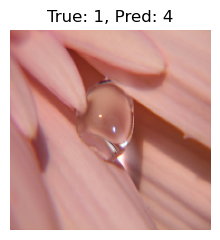

In [35]:
# Visualizing Misclassified Images 
test_images, test_labels = next(iter(validation_batches.unbatch().batch(len(validation_batches))))
misclassified_idx = np.where(y_pred != test_labels.numpy())[0]
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx])
    plt.title(f"True: {test_labels[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.show()

In [36]:
# End the timer
end_time_modified = time.time()
modified_training_time = end_time_modified - start_time_modified

In [37]:
# Calculating Speed-Up
speed_up = baseline_training_time / modified_training_time

In [38]:
# Display results
print(f"Baseline Training Time: {baseline_training_time:.2f} seconds")
print(f"Modified Training Time: {modified_training_time:.2f} seconds")
print(f"Speed-Up: {speed_up:.2f}x")

Baseline Training Time: 633.91 seconds
Modified Training Time: 339.31 seconds
Speed-Up: 1.03x
